## DOMAIN: Semiconductor manufacturing process

## CONTEXT: 
 A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific
monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature
selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors
contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning
and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out
different combinations of features, essential signals that are impacting the yield type can be identified.

## DATA DESCRIPTION: sensor-data.csv : (1567, 592)
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

# PROJECT OBJECTIVE: 
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

### 1. Import and explore the data.

#### -Importing the Libraries

In [399]:
#   Basic packages:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,8)})
import matplotlib.style as style
style.use('fivethirtyeight')

# Statistical packages:
from scipy.stats import zscore,chi2,chi2_contingency,f_oneway,ttest_ind
from statsmodels.stats import anova
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro

# Preprocessing packages:

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,LeaveOneOut
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures,Binarizer,OneHotEncoder

# Feature Engineering packages:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold,KFold
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from sklearn import metrics

# Classification Models
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB,CategoricalNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import imblearn
# Feature extraction
from sklearn.decomposition  import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering

# visualization package:
import plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Mute warnings
import warnings
warnings.filterwarnings('ignore')
#  display options
pd.options.display.max_rows=100
pd.options.display.max_rows=50

In [2]:
data=pd.read_csv('signal-data (1).csv')
data.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
data.tail()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1
1566,2008-10-17 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,NaN,...,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844,-1


In [4]:
print('Numbeer of Rows in the dataset : ',data.shape[0])
print('Number of Columns in the dataset : ',data.shape[1])

Numbeer of Rows in the dataset :  1567
Number of Columns in the dataset :  592


### 2. Data cleansing:


In [5]:
data['Pass/Fail'].dtypes
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [6]:
data['Pass/Fail']=data['Pass/Fail'].replace({-1:0})

In [7]:
data.isna().apply(pd.value_counts)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
False,1567.0,1561,1560,1553,1553,1553,1553,1553,1558,1565,...,618,1566,1566,1566,1566,1566,1566,1566,1566,1567.0
True,NaN,6,7,14,14,14,14,14,9,2,...,949,1,1,1,1,1,1,1,1,NaN


In [8]:
((data.isna().sum()/len(data))*100).to_frame().T

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,0.0,0.382897,0.446713,0.893427,0.893427,0.893427,0.893427,0.893427,0.574346,0.127632,...,60.561583,0.063816,0.063816,0.063816,0.063816,0.063816,0.063816,0.063816,0.063816,0.0


#### When should you drop missing data?
As a rule of thumb, when the data goes missing on 60–70 percent of the variable, dropping the variable should be considered.

In [9]:
columns=data.columns
drop_columns=[]
for i in columns:
    if ((data[i].isna().sum()/len(data))*100)>40:
        drop_columns.append(i)
print('Number of Columns to be Dropped: ',len(drop_columns))

Number of Columns to be Dropped:  32


In [10]:
data.drop(drop_columns,axis=1,inplace=True)

In [11]:
print('Numbeer of Rows in the dataset : ',data.shape[0])
print('Number of Columns in the dataset : ',data.shape[1])

Numbeer of Rows in the dataset :  1567
Number of Columns in the dataset :  560


#### Dope the columns which are hightly correlated to each other

In [12]:
corr=data.corr()
corr.loc[:,:]=np.tril(corr,k=-1)
corr=corr.stack().abs()
correlated=pd.DataFrame(corr[corr>0.85])
correlated_index=correlated.reset_index()
correlated_index.head(4)

,level_0,level_1,0
0,7,4,0.916410
1,27,25,0.980375
2,30,29,0.858147
3,36,34,1.000000


In [13]:
High_corr_index_drop=correlated_index['level_0'].unique()
data.drop(High_corr_index_drop,axis=1,inplace=True)

In [14]:
print('Numbeer of Rows in the dataset : ',data.shape[0])
print('Number of Columns in the dataset : ',data.shape[1])

Numbeer of Rows in the dataset :  1567
Number of Columns in the dataset :  350


In [15]:
data.fillna(data.median(),inplace=True)

In [53]:
data['Pass/Fail']=data['Pass/Fail'].astype('category')

In [16]:
data['Time']=pd.to_datetime(data['Time'])

In [17]:
data['Month']=data['Time'].dt.month
data['Day_of_Month']=data['Time'].dt.day
data['Hour']=data['Time'].dt.hour
data['Week_Day']=data['Time'].dt.weekday

## Data analysis & visualisation:


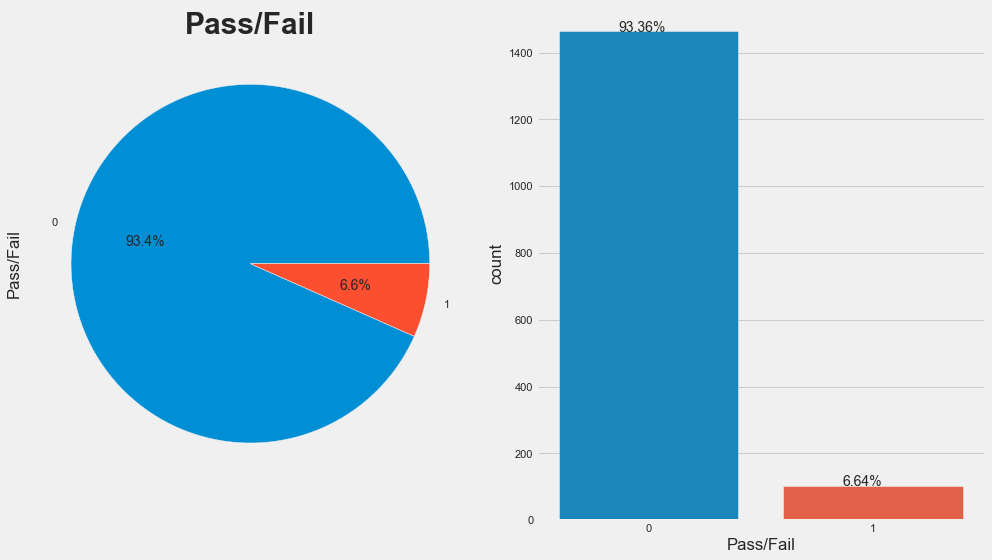

In [18]:
plt.subplot(121)
data['Pass/Fail'].value_counts().plot(kind='pie',autopct='%1.1f%%').set_title('Pass/Fail',fontweight='bold',fontsize=30)
plt.subplot(122)
t=sns.countplot(data['Pass/Fail'])
for i in t.patches:
    txt=str(((i.get_height()/len(data['Pass/Fail']))*100).round(2))+ '%'
    txt_x=i.get_x()+i.get_width()/3
    txt_y=i.get_height()
    t.text(txt_x,txt_y,txt)
plt.tight_layout()

Text(0.5, 1.0, 'Month vise Analysis')

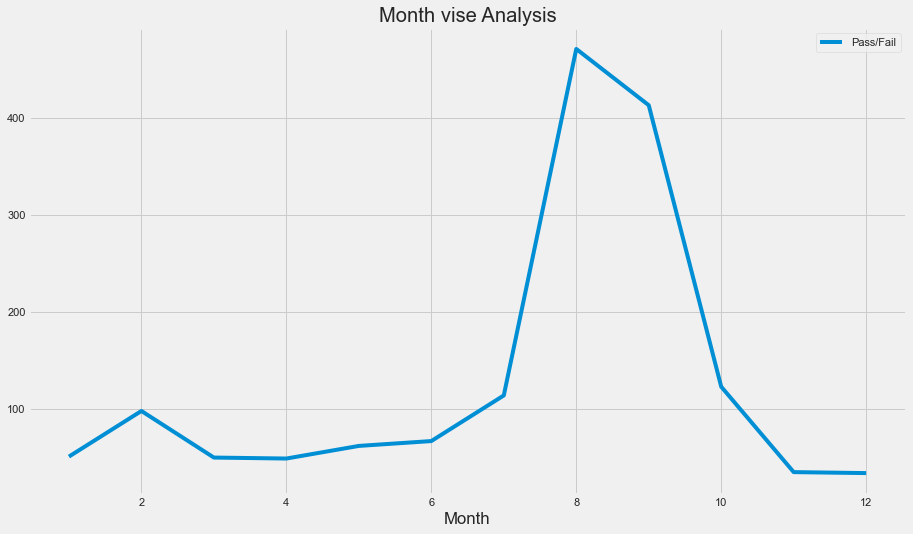

In [19]:
data[['Pass/Fail','Month']].groupby('Month').count().plot(kind='line').set_title('Month vise Analysis')

Text(0.5, 1.0, 'Day of Month vise Analysis')

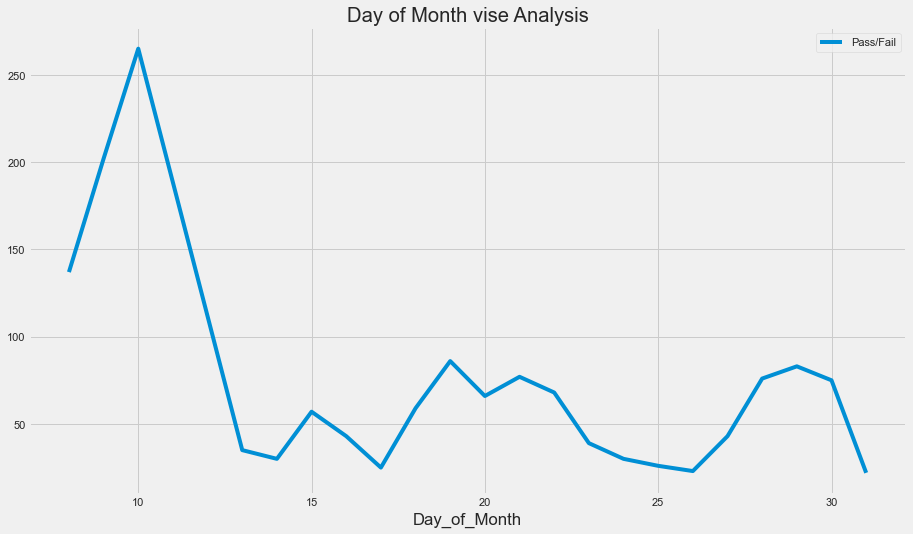

In [20]:
data[['Pass/Fail','Day_of_Month']].groupby('Day_of_Month').count().plot(kind='line').set_title('Day of Month vise Analysis')

Text(0.5, 1.0, 'Hour vise Analysis')

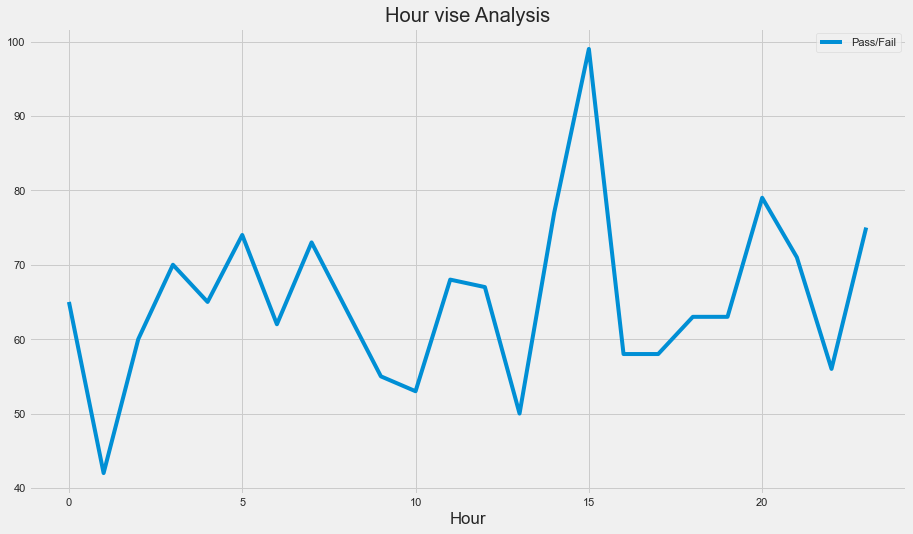

In [21]:
data[['Pass/Fail','Hour']].groupby('Hour').count().plot(kind='line').set_title('Hour vise Analysis')

Text(0.5, 1.0, 'Week day vise Analysis')

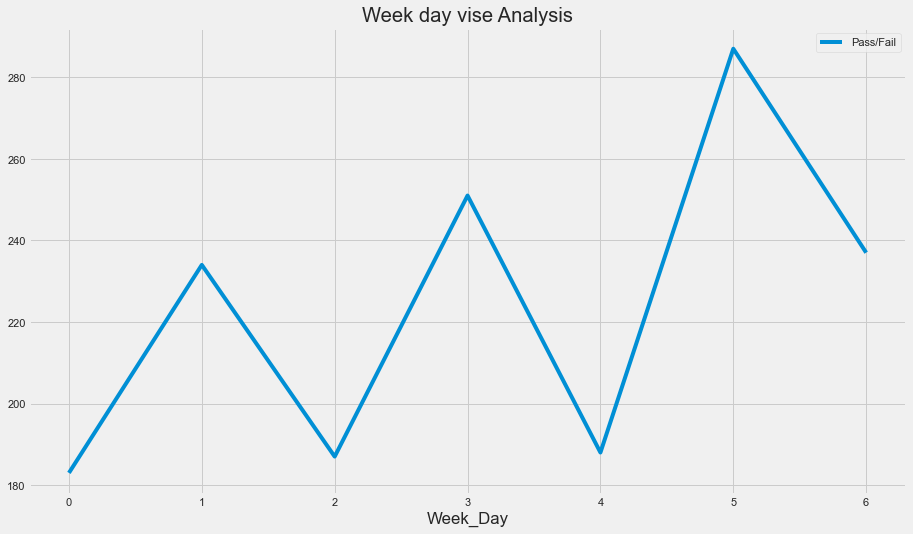

In [22]:
data[['Pass/Fail','Week_Day']].groupby('Week_Day').count().plot(kind='line').set_title('Week day vise Analysis')

In [23]:
import random
random_samples=random.sample(list(data.columns),15)

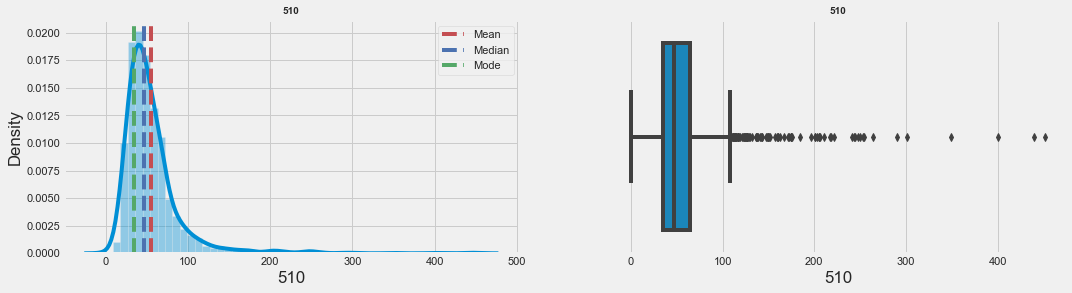

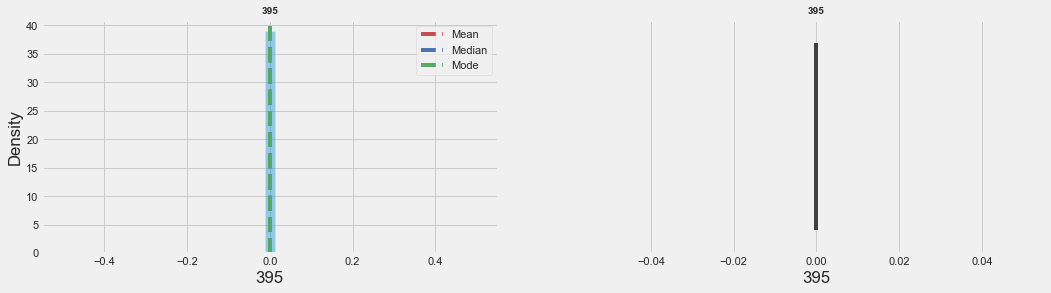

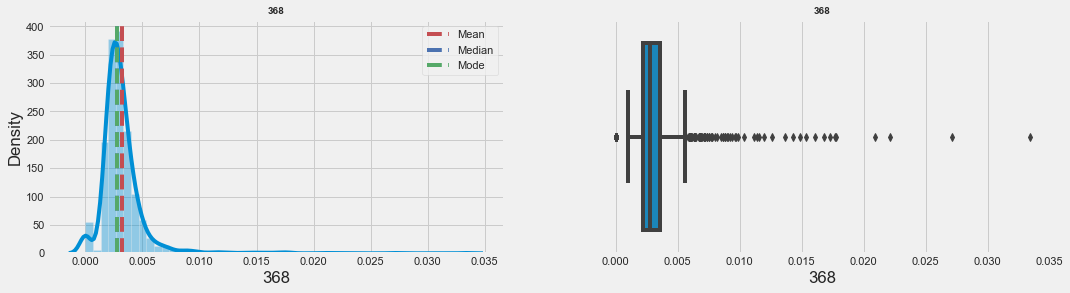

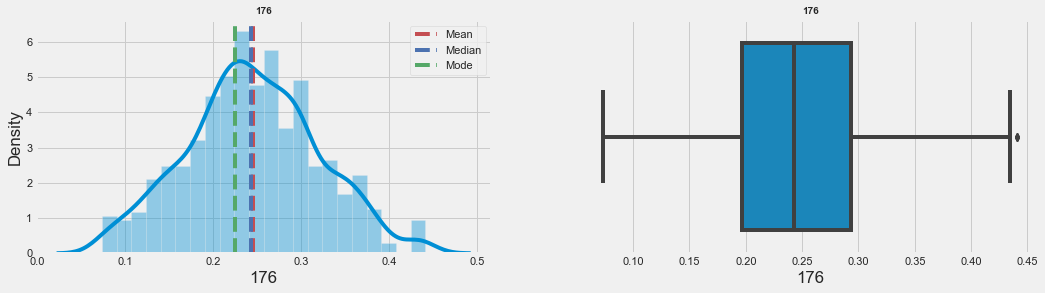

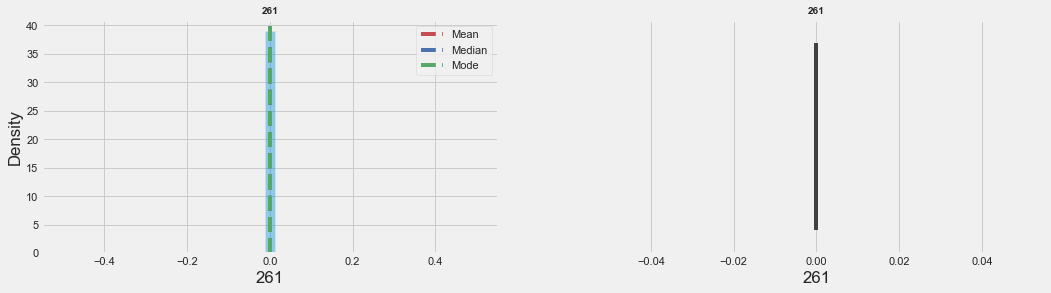

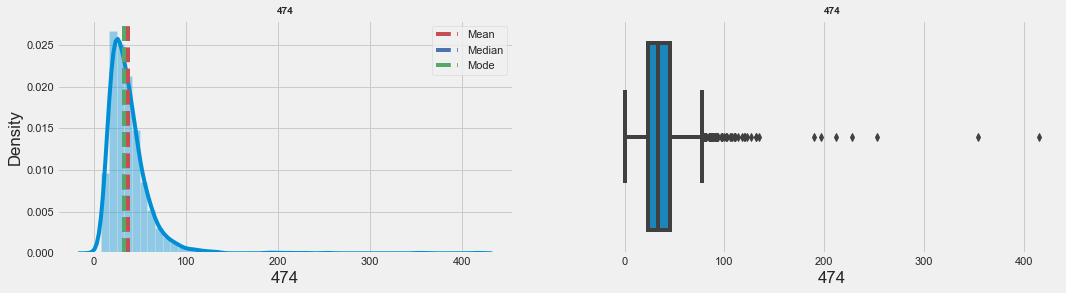

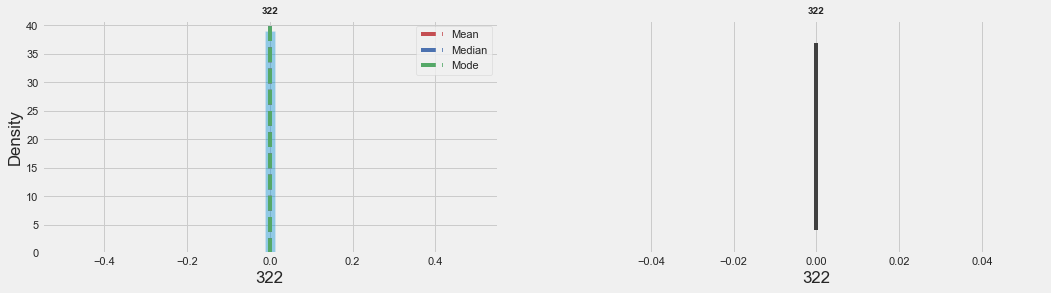

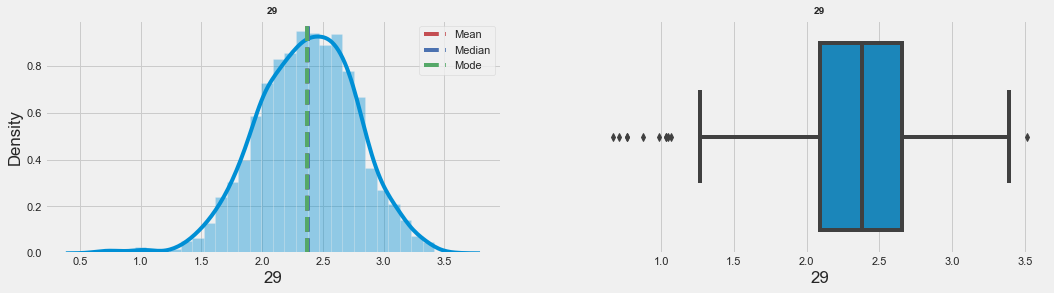

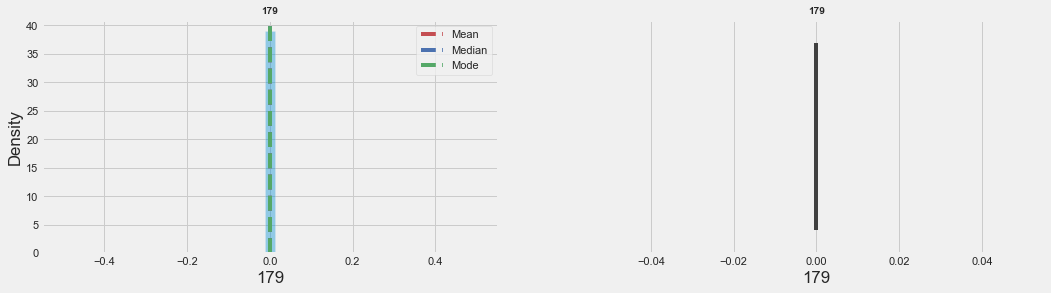

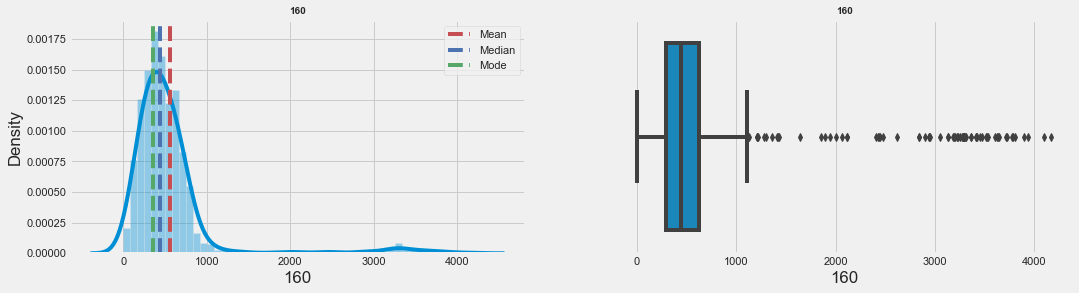

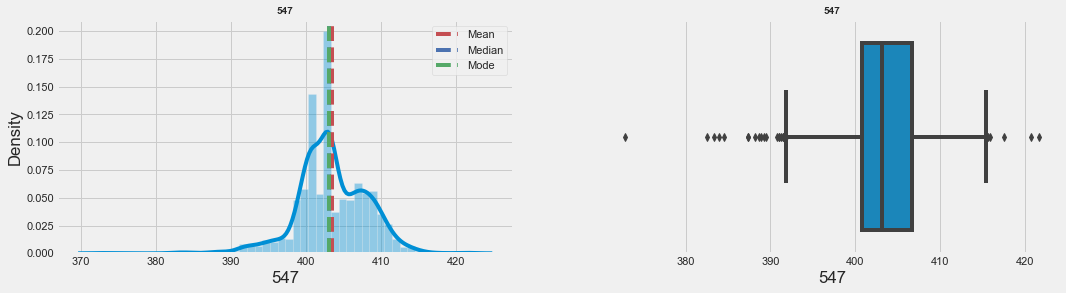

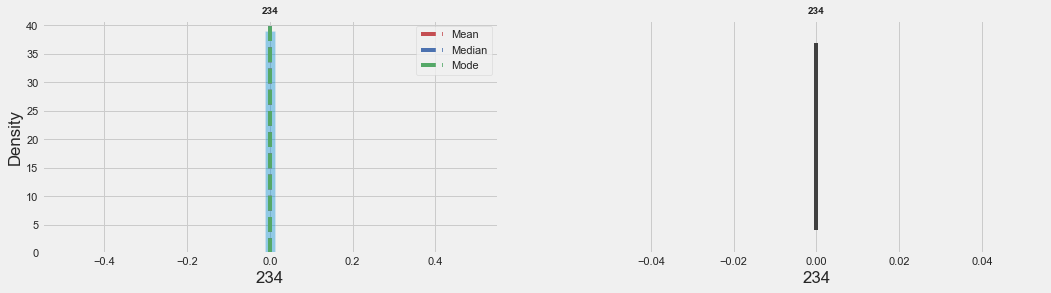

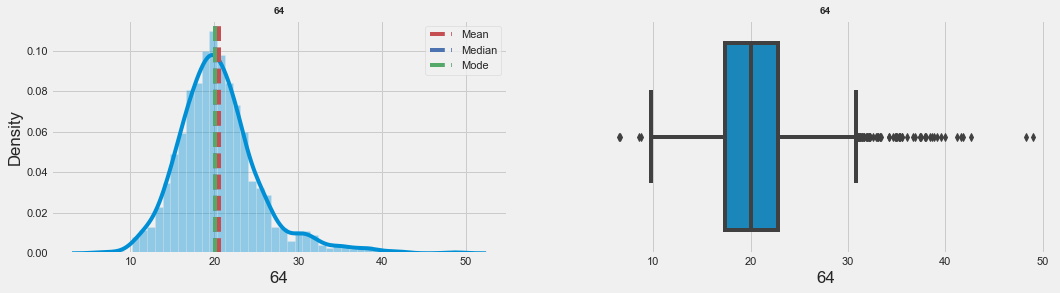

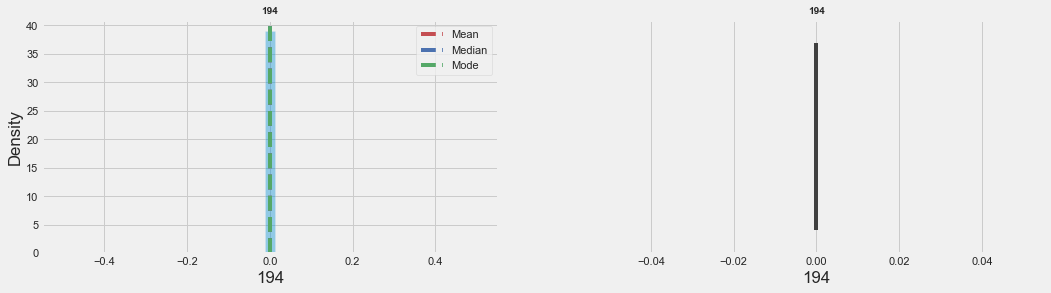

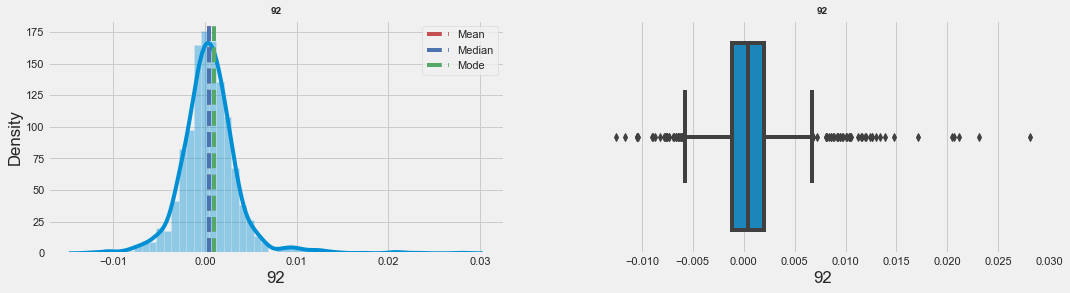

In [24]:
for i in random_samples:
    fig,ax=plt.subplots(1,2,figsize=(16,4))
    sns.distplot(data[i],ax=ax[0]).set_title(i,fontsize=10,fontweight='bold')
    ax[0].axvline(data[i].mean(),linestyle='--',color='r',label='Mean')
    ax[0].axvline(data[i].median(),linestyle='--',color='b',label='Median')
    ax[0].axvline(data[i].mode()[0],linestyle='--',color='g',label='Mode')
    ax[0].legend()
    sns.boxplot(data[i],ax=ax[1]).set_title(i,fontsize=10,fontweight='bold')
    plt.show()

In [25]:
for i in data.columns:
    q25=np.quantile(data[i],0.25)
    q75=np.quantile(data[i],0.75)
    IQR=q75-q25
    Threshold=1.5*IQR
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[x for x in data[i] if (x<lower) | (x>upper)]
    if len(Outliers)>200:
        Median=data[i].median()
        data[i]=np.where(data[i]>upper,Median,data[i])
        data[i]=np.where(data[i]<lower,Median,data[i])
        Outliers=[x for x in data[i] if (x<lower) | (x>upper)]
print('Total Number of Outliers Present in the dataset after Handling is :',len(Outliers))

Total Number of Outliers Present in the dataset after Handling is : 0


### Check For Normality

In [33]:
random_sample_2=random.sample(list(data.columns),15)

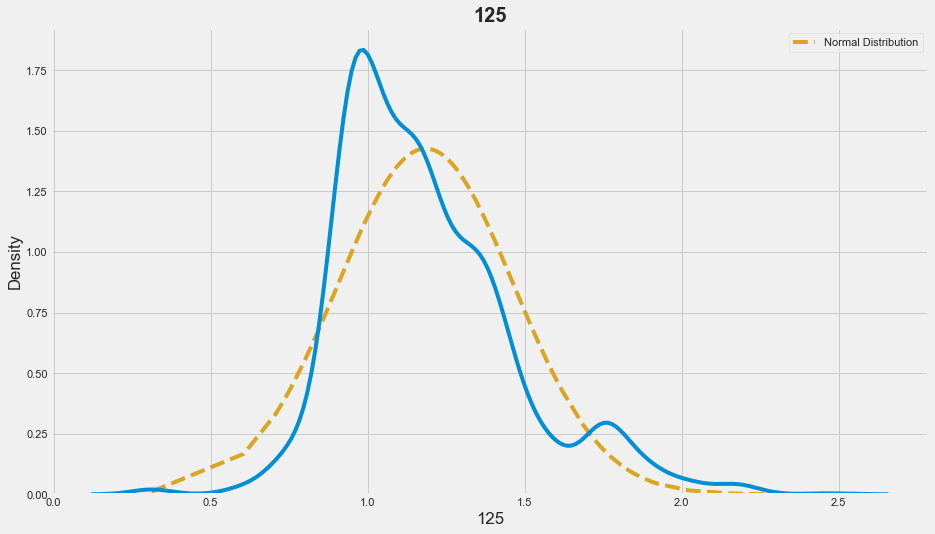

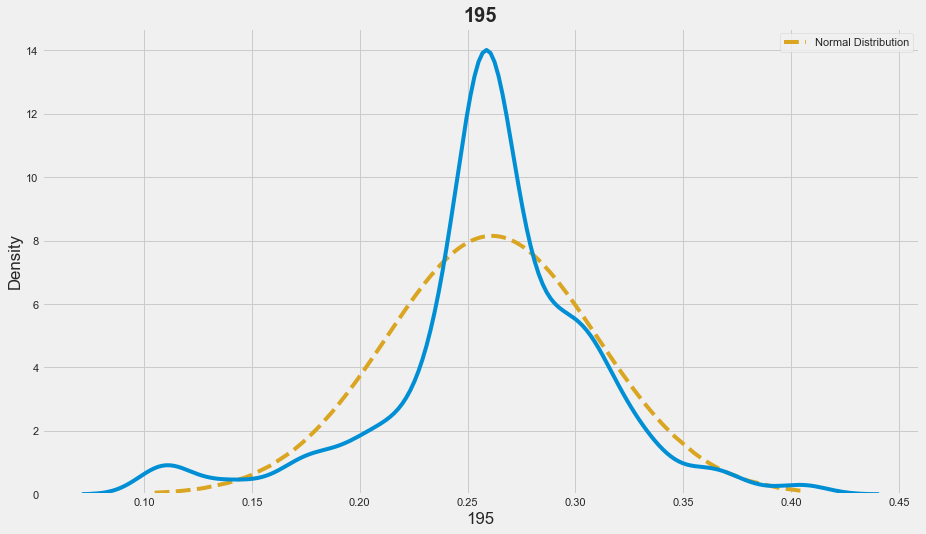

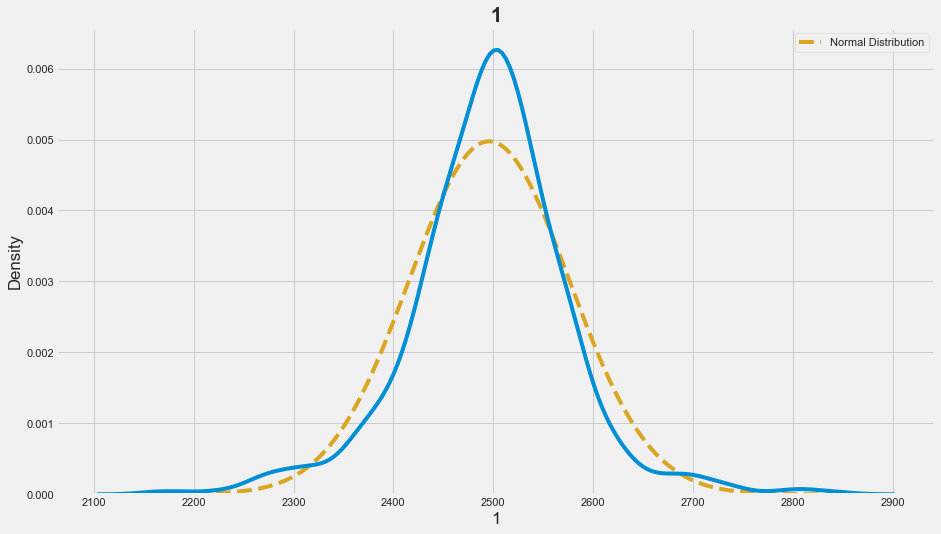

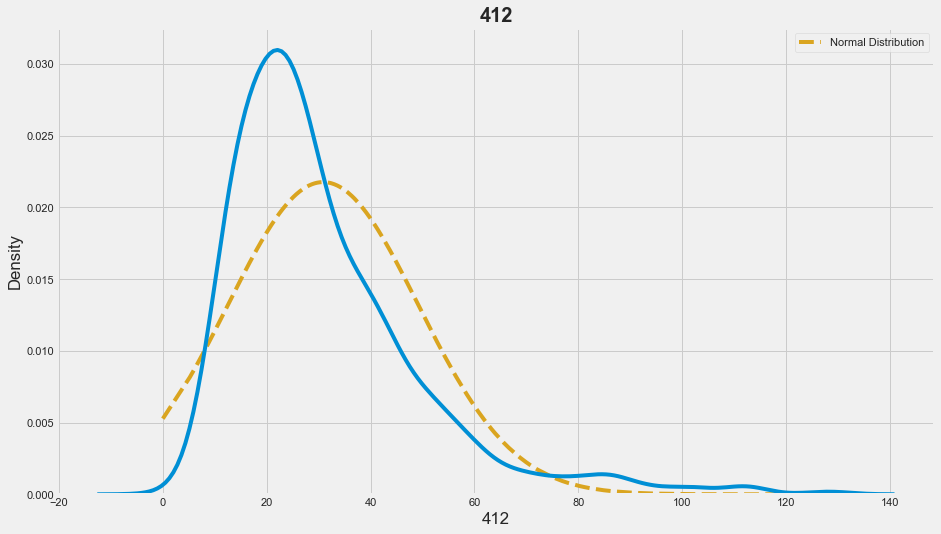

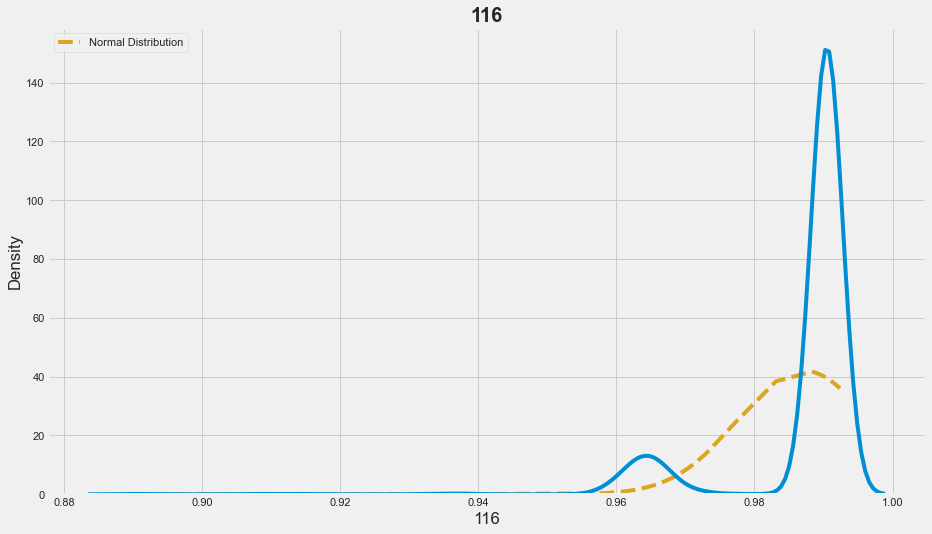

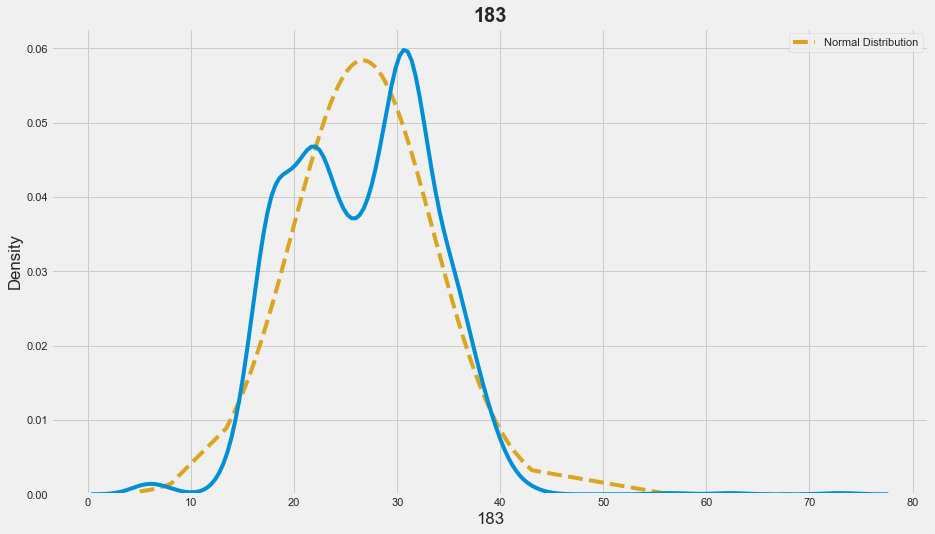

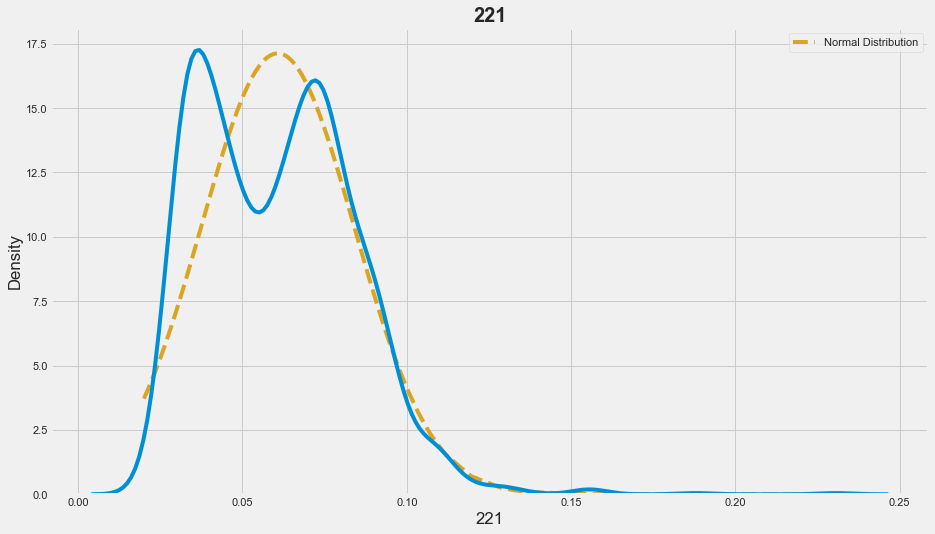

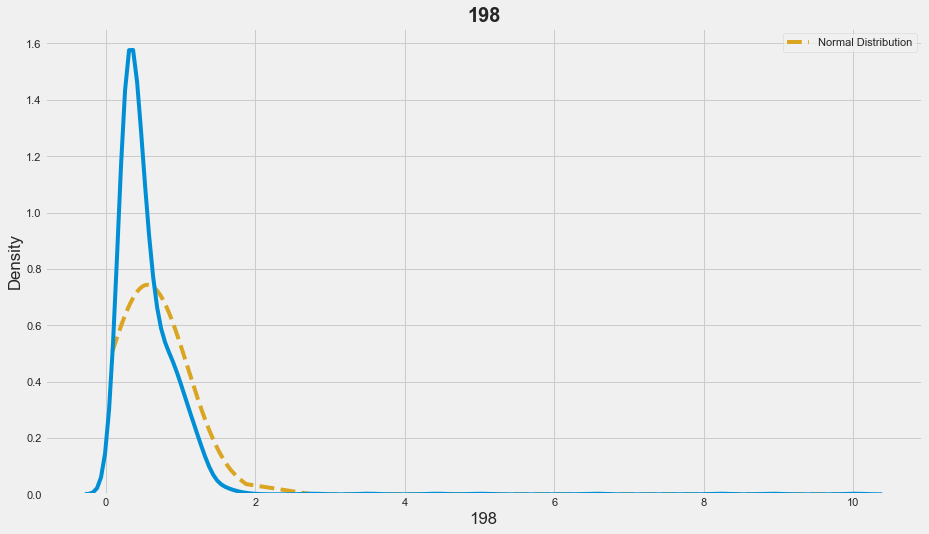

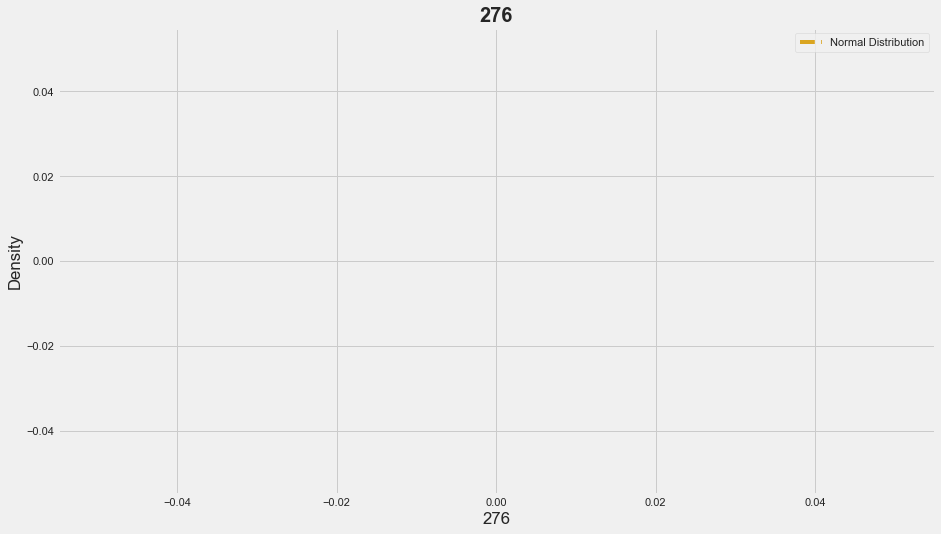

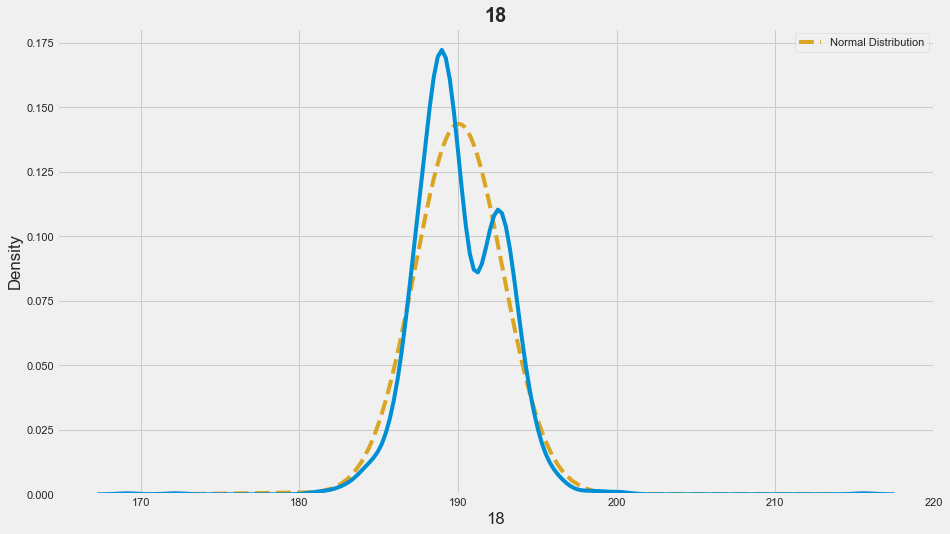

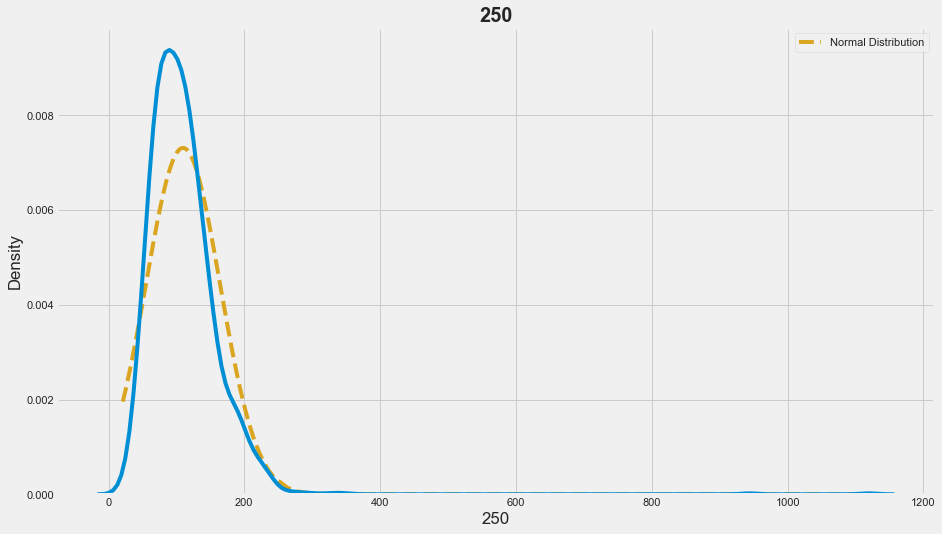

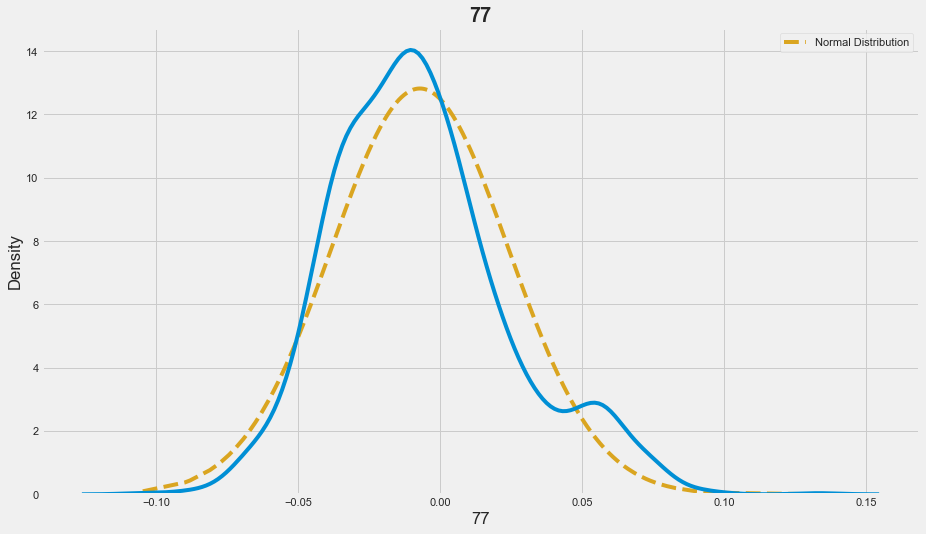

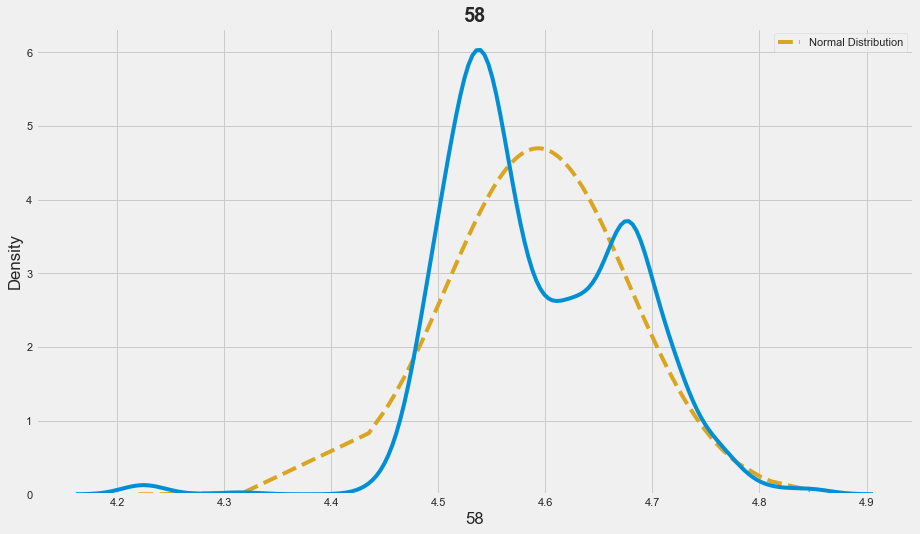

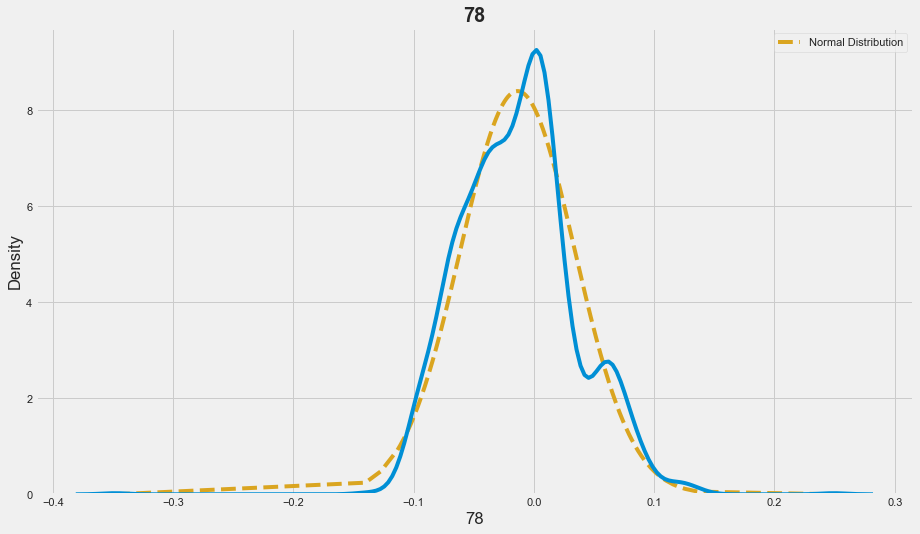

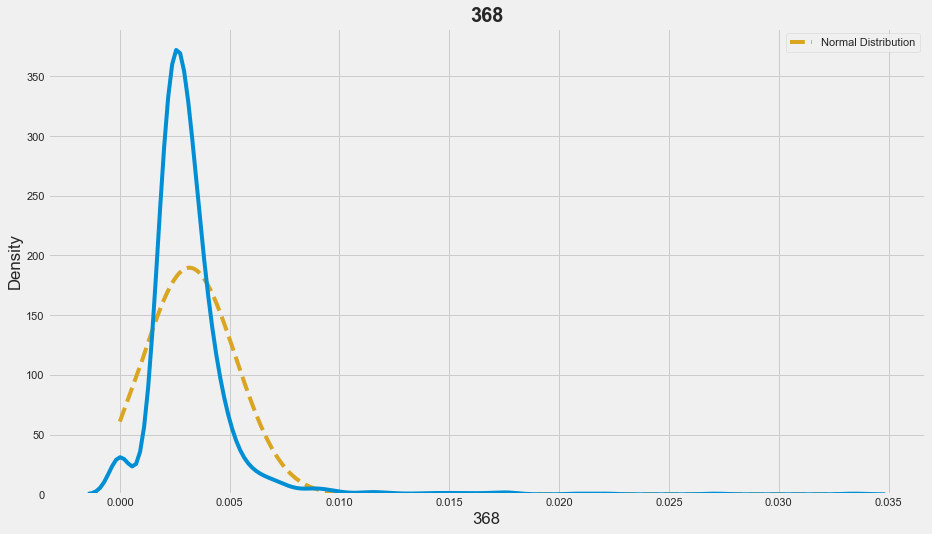

In [34]:
for i in  random_samples_2:
    fit=np.array(data[i])
    fit=sorted(fit)
    val=stats.norm.pdf(fit,np.mean(fit),np.std(fit))
    plt.plot(fit,val,linestyle="--",color='goldenrod',label="Normal Distribution")
    sns.kdeplot(data[i]).set_title(i,fontsize=20,fontweight='bold')
    plt.legend()
    plt.show()

In [46]:
random_sample_3=random.sample(list(data.columns),15)

In [51]:
def Check_Normality(i):
    stats,pval=shapiro(data[i])
    if pval< 0.05:
        print('Reject the Null Hypothesis of {} Which is Normally distributed '.format(i))
    else:
        print('Fail to Reject the Null Hypothesis {} Which is not Normally distributed'.format(i))

In [52]:
for x in random_sample_3:
    Check_Normality(x)

Fail to Reject the Null Hypothesis 404 Which is not Normally distributed
Fail to Reject the Null Hypothesis 394 Which is not Normally distributed
Reject the Null Hypothesis of 582 Which is Normally distributed
Reject the Null Hypothesis of 203 Which is Normally distributed
Reject the Null Hypothesis of 48 Which is Normally distributed
Reject the Null Hypothesis of 77 Which is Normally distributed
Fail to Reject the Null Hypothesis 502 Which is not Normally distributed
Reject the Null Hypothesis of 172 Which is Normally distributed
Reject the Null Hypothesis of 544 Which is Normally distributed
Fail to Reject the Null Hypothesis 465 Which is not Normally distributed
Fail to Reject the Null Hypothesis 503 Which is not Normally distributed
Reject the Null Hypothesis of 47 Which is Normally distributed
Reject the Null Hypothesis of 146 Which is Normally distributed
Reject the Null Hypothesis of 138 Which is Normally distributed
Reject the Null Hypothesis of 21 Which is Normally distributed

##### From Shapiro Test we can clearly say that data is Not Normally distributed

In [61]:
num_cols=data.select_dtypes(include=['int64','float64']).columns

In [62]:
Drop_columns=[]
NDrop_columns=[]
for i in num_cols:
    x=data[data['Pass/Fail']==0][i]
    y=data[data['Pass/Fail']==1][i]
    stats,pval=f_oneway(x,y)
    if pval<0.05:
#         Reject the Null Hypothesis I.e the Feature has considerable amount  of impact on the target
        Drop_columns.append(i)
    else:
#         Fail to Reject the Null Hypothesis i.e Feature has no impact on the target
        NDrop_columns.append(i)

In [69]:
data.drop('Time',axis=1,inplace=True)

In [211]:
Data=data.drop(Drop_columns,axis=1)

In [212]:
Data.shape

(1567, 304)

## 4. Data pre-processing:

In [347]:
x=Data.drop('Pass/Fail',1)
y=Data[['Pass/Fail']]

Text(0.5, 1.0, 'Data imbalance ')

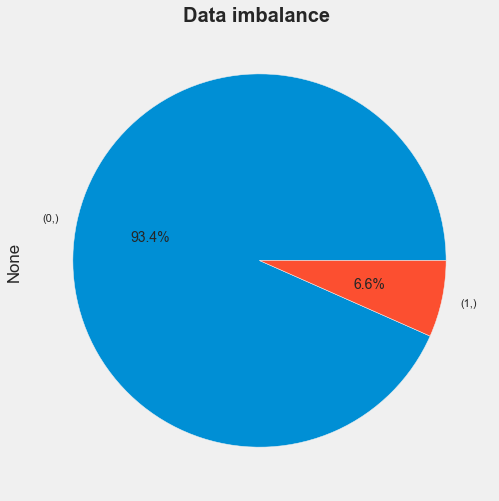

In [348]:
y.value_counts().plot(kind='pie',autopct='%1.1f%%').set_title('Data imbalance ',fontsize=20,fontweight='bold')

In [349]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [350]:
X_scaled=pd.DataFrame(X_scaled,columns=x.columns)

In [351]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaled,y,random_state=1,test_size=0.3)

In [352]:
sm=SMOTE()
X_train_sm,Y_train_sm=sm.fit_resample(X_train,Y_train)

Text(0.5, 1.0, 'Data Balance')

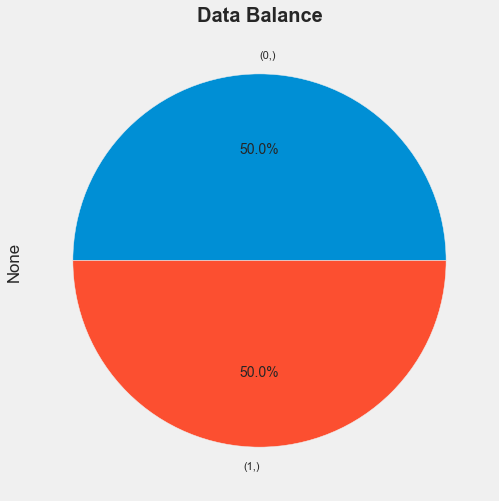

In [353]:
Y_train_sm.value_counts().plot(kind='pie',autopct='%1.1f%%').set_title('Data Balance',fontsize=20, fontweight='bold')

In [354]:
def statistical_testing(original,data):
    stats,pval=ttest_ind(train.all(),test.all())
    if pval<0.05:
        print('Reject the Null Hypothesis since the mean is Significantly different from the mean')
    else:
        print('Fail to Reject the Null Hypotheisis  since the mean are the same')

In [355]:
 statistical_testing(X_scaled,X_train_sm)

Fail to Reject the Null Hypotheisis  since the mean are the same


In [356]:
 statistical_testing(y,Y_train_sm)

Fail to Reject the Null Hypotheisis  since the mean are the same


In [357]:
statistical_testing(X_scaled,x_test)

Fail to Reject the Null Hypotheisis  since the mean are the same


In [358]:
 statistical_testing(y,y_test)

Fail to Reject the Null Hypotheisis  since the mean are the same


## 5.Model training, testing and tuning

#### DecisionTreeClassifier

In [374]:
def roc_auc(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    Pb=model.fit(x_train,y_train).predict_proba(x_test)
    FPR,TPR,Th=metrics.roc_curve(y_test,Pb[:,1])
    print('AUC :',metrics.auc(FPR,TPR))
    Gmean=np.sqrt(TPR*(1-FPR))
    mx=np.argmax(Gmean)
    plt.plot(FPR,TPR)
    plt.scatter(FPR[mx],TPR[mx],color='black')
    plt.plot(0,1,linestyle='--')
    print('Best Threshold: ',Th[mx])
    print(metrics.confusion_matrix(y_test,yhat))
    print(metrics.classification_report(y_test,yhat))

In [375]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
yhat=dt.predict(x_test)
score1=dt.score(x_test,y_test)
Train_score_orginal=dt.score(X_train,Y_train)
Test_score_orginal=dt.score(x_test,y_test)
print('Train score ',Train_score_orginal)
print('Test score ',Test_score_orginal)

Train score  1.0
Test score  0.8747346072186837


AUC : 0.5550256264236901
Best Threshold:  1.0
[[405  34]
 [ 27   5]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       439
           1       0.13      0.16      0.14        32

    accuracy                           0.87       471
   macro avg       0.53      0.54      0.54       471
weighted avg       0.88      0.87      0.88       471



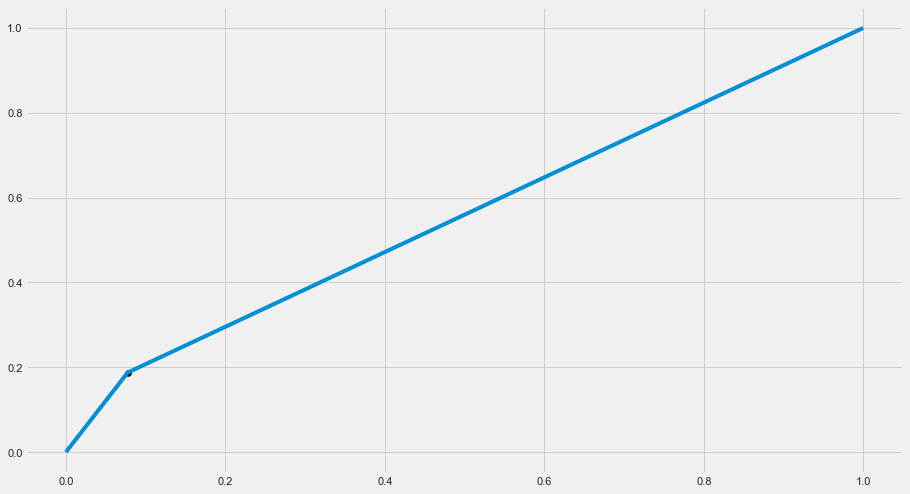

In [376]:
roc_auc(dt,X_train,Y_train,x_test,y_test)

In [361]:
model1 = imblearn.pipeline.make_pipeline( SMOTE(),DecisionTreeClassifier())
model2 = imblearn.pipeline.make_pipeline(RandomUnderSampler(),DecisionTreeClassifier())
model3 = imblearn.pipeline.make_pipeline(RandomOverSampler(),DecisionTreeClassifier())
model4 = imblearn.pipeline.make_pipeline(SMOTE(),RandomUnderSampler(),DecisionTreeClassifier())
cv=StratifiedKFold(n_splits=10)
models=[model1,model2,model3,model4]
for i in models:
    result=cross_val_score(i,X_train,Y_train,cv=cv,scoring="roc_auc")
    print('{} will provide mean of {} and standard deviation of {} '.format(i,result.mean(),result.std()))

Pipeline(steps=[('smote', SMOTE()),
                ('decisiontreeclassifier', DecisionTreeClassifier())]) will provide mean of 0.5004765984063528 and standard deviation of 0.051368477061744966 
Pipeline(steps=[('randomundersampler', RandomUnderSampler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())]) will provide mean of 0.48222886241875396 and standard deviation of 0.030525429693565944 
Pipeline(steps=[('randomoversampler', RandomOverSampler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())]) will provide mean of 0.5153245764325147 and standard deviation of 0.06616828785237472 
Pipeline(steps=[('smote', SMOTE()),
                ('randomundersampler', RandomUnderSampler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())]) will provide mean of 0.516001910472927 and standard deviation of 0.08191915368913227 


In [367]:
model1.fit(X_train,Y_train)
yhat_pipe=model1.predict(x_test)
Train_model1_score_orginal=model1.score(X_train,Y_train)
Test_model1_score_orginal=model1.score(x_test,y_test)
print('Train score ',Train_model1_score_orginal)
print('Test score ',Test_model1_score_orginal)

Train score  1.0
Test score  0.8535031847133758


AUC : 0.5669134396355353
Best Threshold:  1.0
[[382  57]
 [ 25   7]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       439
           1       0.11      0.22      0.15        32

    accuracy                           0.83       471
   macro avg       0.52      0.54      0.52       471
weighted avg       0.88      0.83      0.85       471



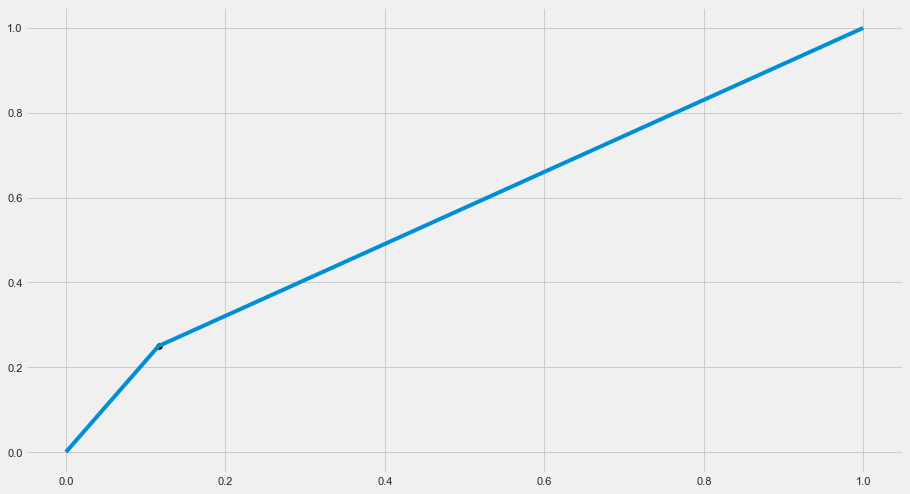

In [377]:
roc_auc(model1,X_train_sm,Y_train_sm,x_test,y_test)

In [369]:
param_grid={
            'decisiontreeclassifier__criterion':["gini",'entropy'],
            'decisiontreeclassifier__max_depth':[3,4,5],
            "decisiontreeclassifier__min_samples_split":[5,10,20],
            'decisiontreeclassifier__min_samples_leaf':[1,2,3],
            'decisiontreeclassifier__min_impurity_decrease':[0.001,0.01]
}
cv=StratifiedKFold(n_splits=5)
dtree_grid=GridSearchCV(model1,param_grid=param_grid,cv=cv,scoring="balanced_accuracy")
dtree_grid.fit(X_train,Y_train)
print('Score: ',dtree_grid.best_score_)
print('Best Parameters: ',dtree_grid.best_params_)

Score:  0.5645446471271436
Best Parameters:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.01, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 5}


In [382]:
dtree_grid.best_estimator_.fit(X_train,Y_train)
yhat=dtree_grid.best_estimator_.predict(x_test)
Train_score_best=dtree_grid.best_estimator_.score(X_train_sm,Y_train_sm)
Test_score_best=dtree_grid.best_estimator_.score(x_test,y_test)
print('Train score: ',Train_score_best)
print('Test score: ',Test_score_best)

Train score:  0.80810546875
Test score:  0.7070063694267515


AUC : 0.5399701025056947
Best Threshold:  0.4258064516129032
[[319 120]
 [ 20  12]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       439
           1       0.09      0.38      0.15        32

    accuracy                           0.70       471
   macro avg       0.52      0.55      0.48       471
weighted avg       0.88      0.70      0.77       471



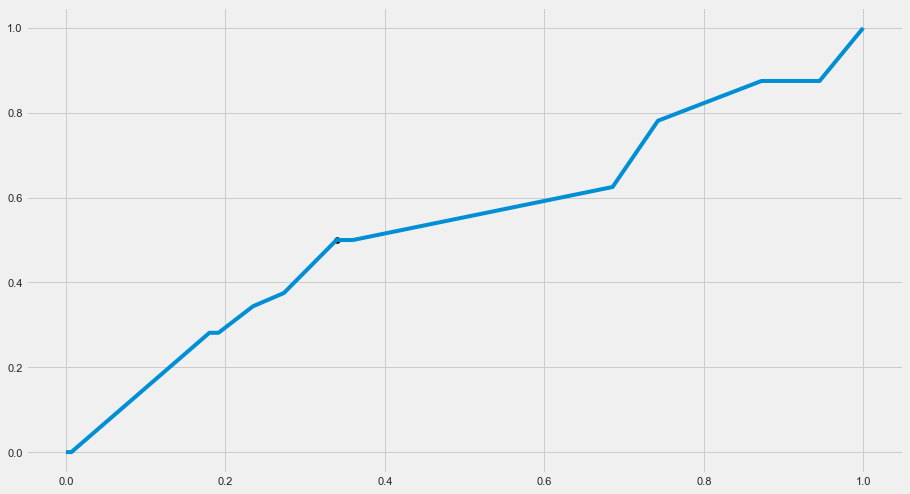

In [383]:
roc_auc(dtree_grid.best_estimator_,X_train_sm,Y_train_sm,x_test,y_test)

#### Feature Elimination

In [384]:
a=pd.DataFrame(dt.feature_importances_,columns=['importance'],index=X_train_sm.columns).sort_values(by='importance',ascending=False)
a.index.name = 'Feature'
a['cummulative_importance'] = np.cumsum(a.importance)
most_imp = a[a['cummulative_importance'] <= .95]
print(len(most_imp))
most_imp

47


,importance,cummulative_importance
Feature,,
71,0.065126,0.065126
488,0.043826,0.108952
268,0.042490,0.151442
120,0.039352,0.190795
107,0.038705,0.229500
135,0.038515,0.268015
41,0.033785,0.301800
80,0.033447,0.335247
23,0.026904,0.362152


### PCA

##### Feature Extraction

[0.04922962 0.09711878 0.14180267 0.1762029  0.20783831 0.23859117
 0.2683019  0.29724996 0.32555213 0.35284247 0.37900073 0.40468339
 0.42966726 0.45387214 0.47789549 0.50114652 0.52401886 0.54664055
 0.569127   0.59114632 0.61267887 0.63411066 0.65526971 0.67594481
 0.69594979 0.71549099 0.73460763 0.75308822 0.77102335 0.7884434
 0.80527403 0.82197766 0.83839714 0.85449154 0.87041973 0.88549022
 0.89971748 0.91363801 0.92702588 0.93964658]


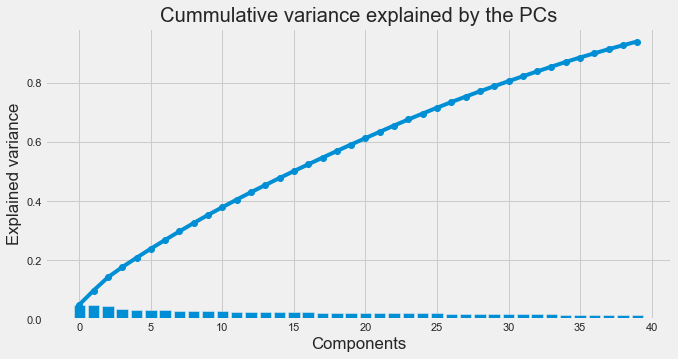

In [390]:
pca=PCA(40)
pca.fit(X_train.loc[:,most_imp.index],Y_train)
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.bar(x = range(0, len(pca.components_)), height = pca.explained_variance_ratio_)
plt.title('Cummulative variance explained by the PCs')
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.show()

In [391]:
X_train_important=X_train.loc[:,most_imp.index]
x_test_important=x_test.loc[:,most_imp.index]

In [394]:
pipe = imblearn.pipeline.make_pipeline(SMOTE(),PCA(40),DecisionTreeClassifier(criterion ='gini',max_depth= 3 ,min_impurity_decrease= 0.01 ,min_samples_leaf= 2,min_samples_split= 5))
pipe.fit(X_train_important,Y_train)
yhat_pipe=pipe.predict(x_test_important)
Train_score_best_pca=pipe.score(X_train_important,Y_train)
Test_score_best_pca=pipe.score(x_test_important,y_test)
print('Train score: ',Train_score_best_pca)
print('Test score: ',Test_score_best_pca)

Train score:  0.5766423357664233
Test score:  0.5116772823779193


AUC : 0.5977363325740319
Best Threshold:  0.6911764705882353
[[287 152]
 [ 17  15]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       439
           1       0.09      0.47      0.15        32

    accuracy                           0.64       471
   macro avg       0.52      0.56      0.46       471
weighted avg       0.89      0.64      0.73       471



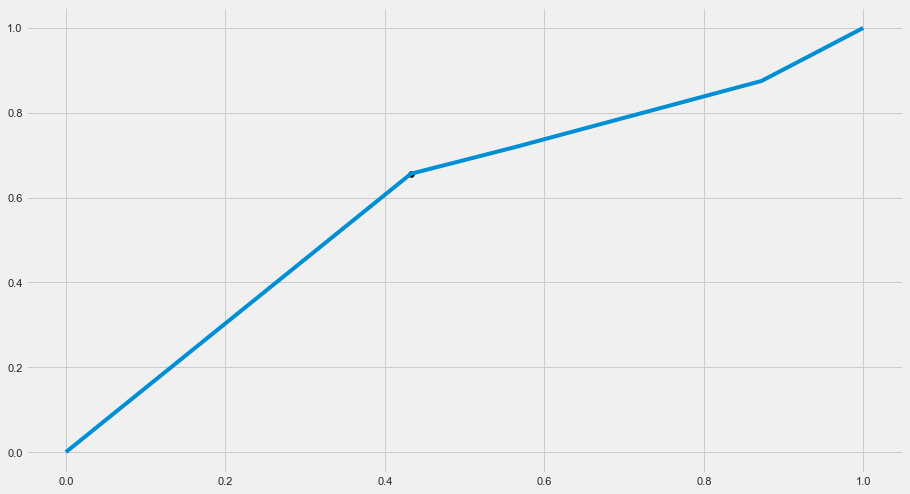

In [395]:
roc_auc(pipe,X_train_important,Y_train,x_test_important,y_test)

#### StratifiedKFold

In [415]:
cv=StratifiedKFold(n_splits=10)
for train,test in cv.split(X_scaled,y):
    X_train,x_test=x.loc[train],x.loc[test]
    Y_train,y_test=y.loc[train],y.loc[test]
pipe.fit(X_train,Y_train)
yhat_S=pipe.predict(x_test)
Train_Stratified=pipe.score(X_train,Y_train)
Test_Stratified=pipe.score(x_test,y_test)
Precision_S=metrics.precision_score(y_test,yhat_S)
Recall_S=metrics.recall_score(y_test,yhat_S)
F1_S=metrics.f1_score(y_test,yhat_S)
print("Train ",Train_Stratified)
print('Test ',Test_Stratified)
print('Precision ',Precision_S)
print('Recacll',Recall_S)
print('F1 score',F1_S)

Train  0.630049610205528
Test  0.6538461538461539
Precision  0.07692307692307693
Recacll 0.4
F1 score 0.12903225806451613


#### KFold

In [416]:
cv=KFold(n_splits=10)
for train,test in cv.split(X_scaled,y):
    X_train,x_test=x.loc[train],x.loc[test]
    Y_train,y_test=y.loc[train],y.loc[test]
pipe.fit(X_train,Y_train)
yhat_K=pipe.predict(x_test)
Train_K=pipe.score(X_train,Y_train)
Test_K=pipe.score(x_test,y_test)
Precision_K=metrics.precision_score(y_test,yhat_K)
Recall_K=metrics.recall_score(y_test,yhat_K)
F1_K=metrics.f1_score(y_test,yhat_K)
print("Train ",Train_K)
print('Test ',Test_K)
print('Precision ',Precision_K)
print('Recacll',Recall_K)
print('F1 score',F1_K)

Train  0.5832742735648476
Test  0.5512820512820513
Precision  0.014492753623188406
Recacll 0.3333333333333333
F1 score 0.027777777777777776


In [418]:
crossvalresult=pd.DataFrame({
    'StratifiedKFold':[Train_Stratified,Test_Stratified,Precision_S,Recall_S,F1_S],
    'KFold':[Train_K,Test_K,Precision_K,Recall_K,F1_K]
},index=['Train','Test','Precision','Recall','F1'])

In [419]:
crossvalresult

,StratifiedKFold,KFold
Train,0.630050,0.583274
Test,0.653846,0.551282
Precision,0.076923,0.014493
Recall,0.400000,0.333333
F1,0.129032,0.027778


In [420]:
models=[]
models.append(('DecisionTreeOriginal',dt))
models.append(('SMOTE&DecisionTree via Pipline',model1))
models.append(('Finding The Best Hyperparameter& after Pipline',dtree_grid.best_estimator_))
models.append(('Final Model After Feature Extraction',pipe))

In [425]:
import time
def scores(model,x_train,y_train,x_test,y_test):
    start=time.time()
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    trainscore=model.score(x_train,y_train)
    testscore=model.score(x_test,y_test)
    r2score=metrics.r2_score(y_test,yhat)
    mse=metrics.mean_squared_error(y_test,yhat)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,yhat))
    rmsle=np.sqrt(metrics.mean_squared_log_error(y_test,yhat))
    f1_score=metrics.f1_score(y_test,yhat)
    recall_score=metrics.recall_score(y_test,yhat)
    roc_auc=metrics.roc_auc_score(y_test,yhat)
    
    scorer={
        "r2":metrics.make_scorer(metrics.r2_score),
        "mse":metrics.make_scorer(metrics.mean_squared_error),
        "msle":metrics.make_scorer(metrics.mean_squared_log_error),
        "roc_auc":metrics.make_scorer(metrics.roc_auc_score)
    }
    
    
    cv=cross_validate(model,x_train,y_train,cv=10,scoring=scorer)
    
    r2_cv=max(cv['test_r2'])
    rmse_cv=max([np.sqrt(i) for i in cv['test_mse']])
    rmsle_cv=max([np.sqrt(i) for i in cv['test_msle']])
    roc_auc_cv=max([i for i in cv['test_roc_auc']])
    
    end=time.time()
    duration=end-start
    return trainscore,testscore,r2score,mse,rmse,rmsle,f1_score,recall_score,roc_auc, r2_cv,rmse_cv, rmsle_cv,roc_auc_cv,duration

best_model={}
for name,model in models:
    best_model[name]=scores(model,X_train,Y_train,x_test,y_test)

In [426]:
Best=pd.DataFrame(best_model,index=['trainscore','testscore','r2score','mse','rmse','rmsle','f1_score','recall_score','roc_auc','r2_cv','rmse_cv', 'rmsle_cv','roc_auc_cv','duration']).T

In [428]:
plt.figure(figsize=(10,5))
Best.sort_values(by=["roc_auc_cv"],ascending=False).style.background_gradient('magma')

,trainscore,testscore,r2score,mse,rmse,rmsle,f1_score,recall_score,roc_auc,r2_cv,rmse_cv,rmsle_cv,roc_auc_cv,duration
Finding The Best Hyperparameter& after Pipline,0.650602,0.769231,-11.235294,0.230769,0.480384,0.332977,0.000000,0.000000,0.392157,-1.260305,0.829423,0.574913,0.636641,6.968285
Final Model After Feature Extraction,0.535790,0.538462,-23.470588,0.461538,0.679366,0.470901,0.052632,0.666667,0.601307,-3.843511,0.847532,0.587464,0.597328,3.124110
SMOTE&DecisionTree via Pipline,1.000000,0.833333,-7.836601,0.166667,0.408248,0.282976,0.071429,0.333333,0.588235,-1.583206,0.607284,0.420937,0.573664,13.546550
DecisionTreeOriginal,1.000000,0.871795,-5.797386,0.128205,0.358057,0.248187,0.000000,0.000000,0.444444,-0.614504,0.601417,0.416870,0.500763,10.049912


<Figure size 720x360 with 0 Axes>